# Analysis of average Ford Go Bike trip duration in 201
## by Dmitrij Burlak

## Investigation Overview

The main insights I want to provide in the following slides are about the trips of Ford Go Bike users for the year 2018: 

Especially the answers to: 
- How long does the average trip take? 
- Does trip duration depend on if a user is a subscriber or customer 
- How are locations influencing the trip duration?


## Dataset Overview

What is the structure of your dataset?
There are 1740396 rides in the dataset with 24 anonymized features

Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
Member Year of Birth
Member Gender
Dreived features

User Age
Start Daytime
End Daytime
Start Weekday
End Weekday
Start Month
Path

Most variables are categorical in nature, but the variables duration and age are numeric variables. The ordinal variable user_type, start_month, start/end_weekday are ordered with the following levels:

User Type: Customer -> Subscriber Start/End Daytime: 'morning' ->'afternoon' -> 'evening' -> 'night'

Start/End Weekday: 0 -> ... -> 7

Start Month: 1 -> ... -> 12

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('data/rides_all_explored.csv')

## (Average trip duration in 2018)

The distribution of durations in 2018 is strongly skewed to the right. 99% of all rides are shorter than 64 min. And 50% are using the bike even less then 10 min in a row. The longest ride though is about 24 hours.

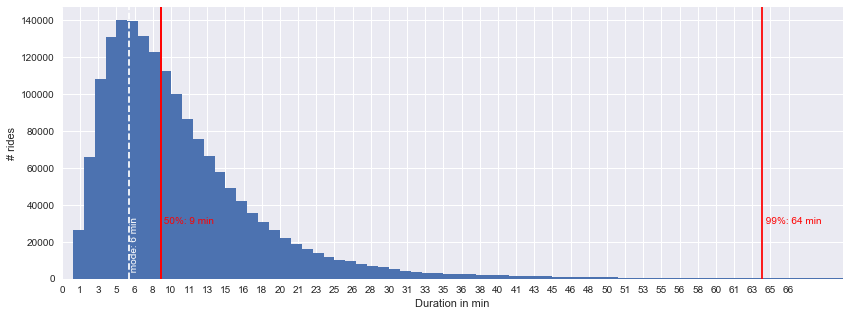

In [39]:
# How long does the average trip take/ start with a standard hist plot of ride duration
binsize = 60
bins = np.arange(0, rides['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[14, 5])
plt.hist(data = rides, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in min')
xticks = np.arange(0,4000+100, 100)
xticksl= [int(x/60) for x in xticks]
plt.xticks(xticks,xticksl)
plt.xlim(0,4300)
plt.ylabel('# rides')
plt.axvline(rides.duration_sec.median(), color='r')


## The 99% line
uperPercentile = rides.duration_sec.quantile(0.99)
plt.axvline(uperPercentile, color='r')
plt.text(x=uperPercentile+2, y=30e3, s=' 99%: {} min'.format(int(uperPercentile/60)), color='r')

## The 50% line
median=rides.duration_sec.median()
plt.axvline(median, color='r')
plt.text(x=median+2, y=30e3, s=' 50%: {} min'.format(int(median/60)), color='r')

## The mode line
mode=rides.duration_sec.mode()[0]
plt.axvline(mode, color='w',  linestyle='--')
plt.text(x=mode+2, y=30e3, s=' mode: {} min'.format(int(mode/60)), color='w', rotation=90)
plt.show()

How does the user type ratio looks like?

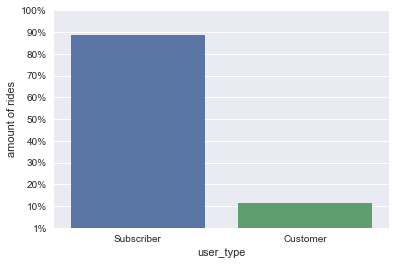

In [65]:
#General ratio between user types
sns.countplot(data=rides, x = 'user_type');

step = len(rides) // 10
yticks = np.arange(0,len(rides), step);
yticksl =  ['{}%'.format(int(x*100 + 1)) for x in (yticks / len(rides))]
plt.yticks(yticks, yticksl);
plt.ylabel('amount of rides')

## (Visualization 2)


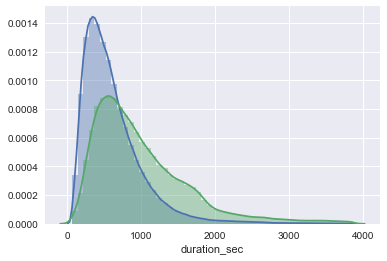

In [5]:
#kde over types showing each destribution / could also be violin plot
per_99=rides[rides.duration_sec < 3865]
sub=per_99[per_99.user_type == 'Subscriber']
cus=per_99[per_99.user_type == 'Customer']
sns.distplot( sub.duration_sec)
sns.distplot( cus.duration_sec)

Lets get an overview of locations in the dataset.

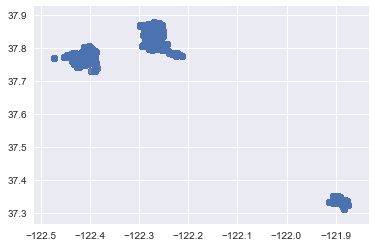

In [3]:
# show the location clusters with namings of the locations
plt.scatter(data =rides, y='start_station_latitude' , x='start_station_longitude', alpha=0.01);

Wall time: 14.5 s


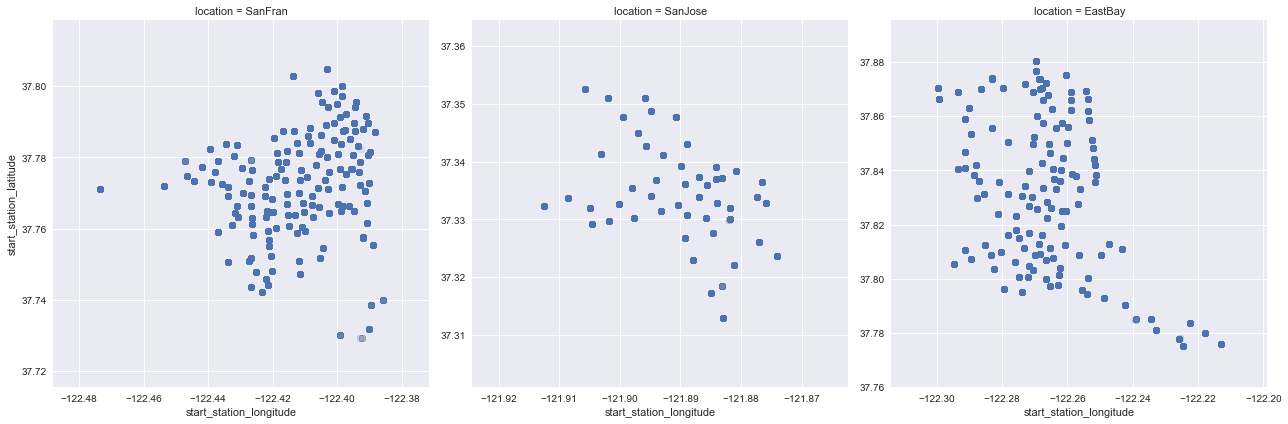

In [4]:
%%time
g = sns.FacetGrid(data=rides, col = 'location', size=6, sharey=False, sharex=False)
g.map(plt.scatter, 'start_station_longitude','start_station_latitude', alpha=0.01 );

## (Visualization 3)



Wall time: 40.4 s


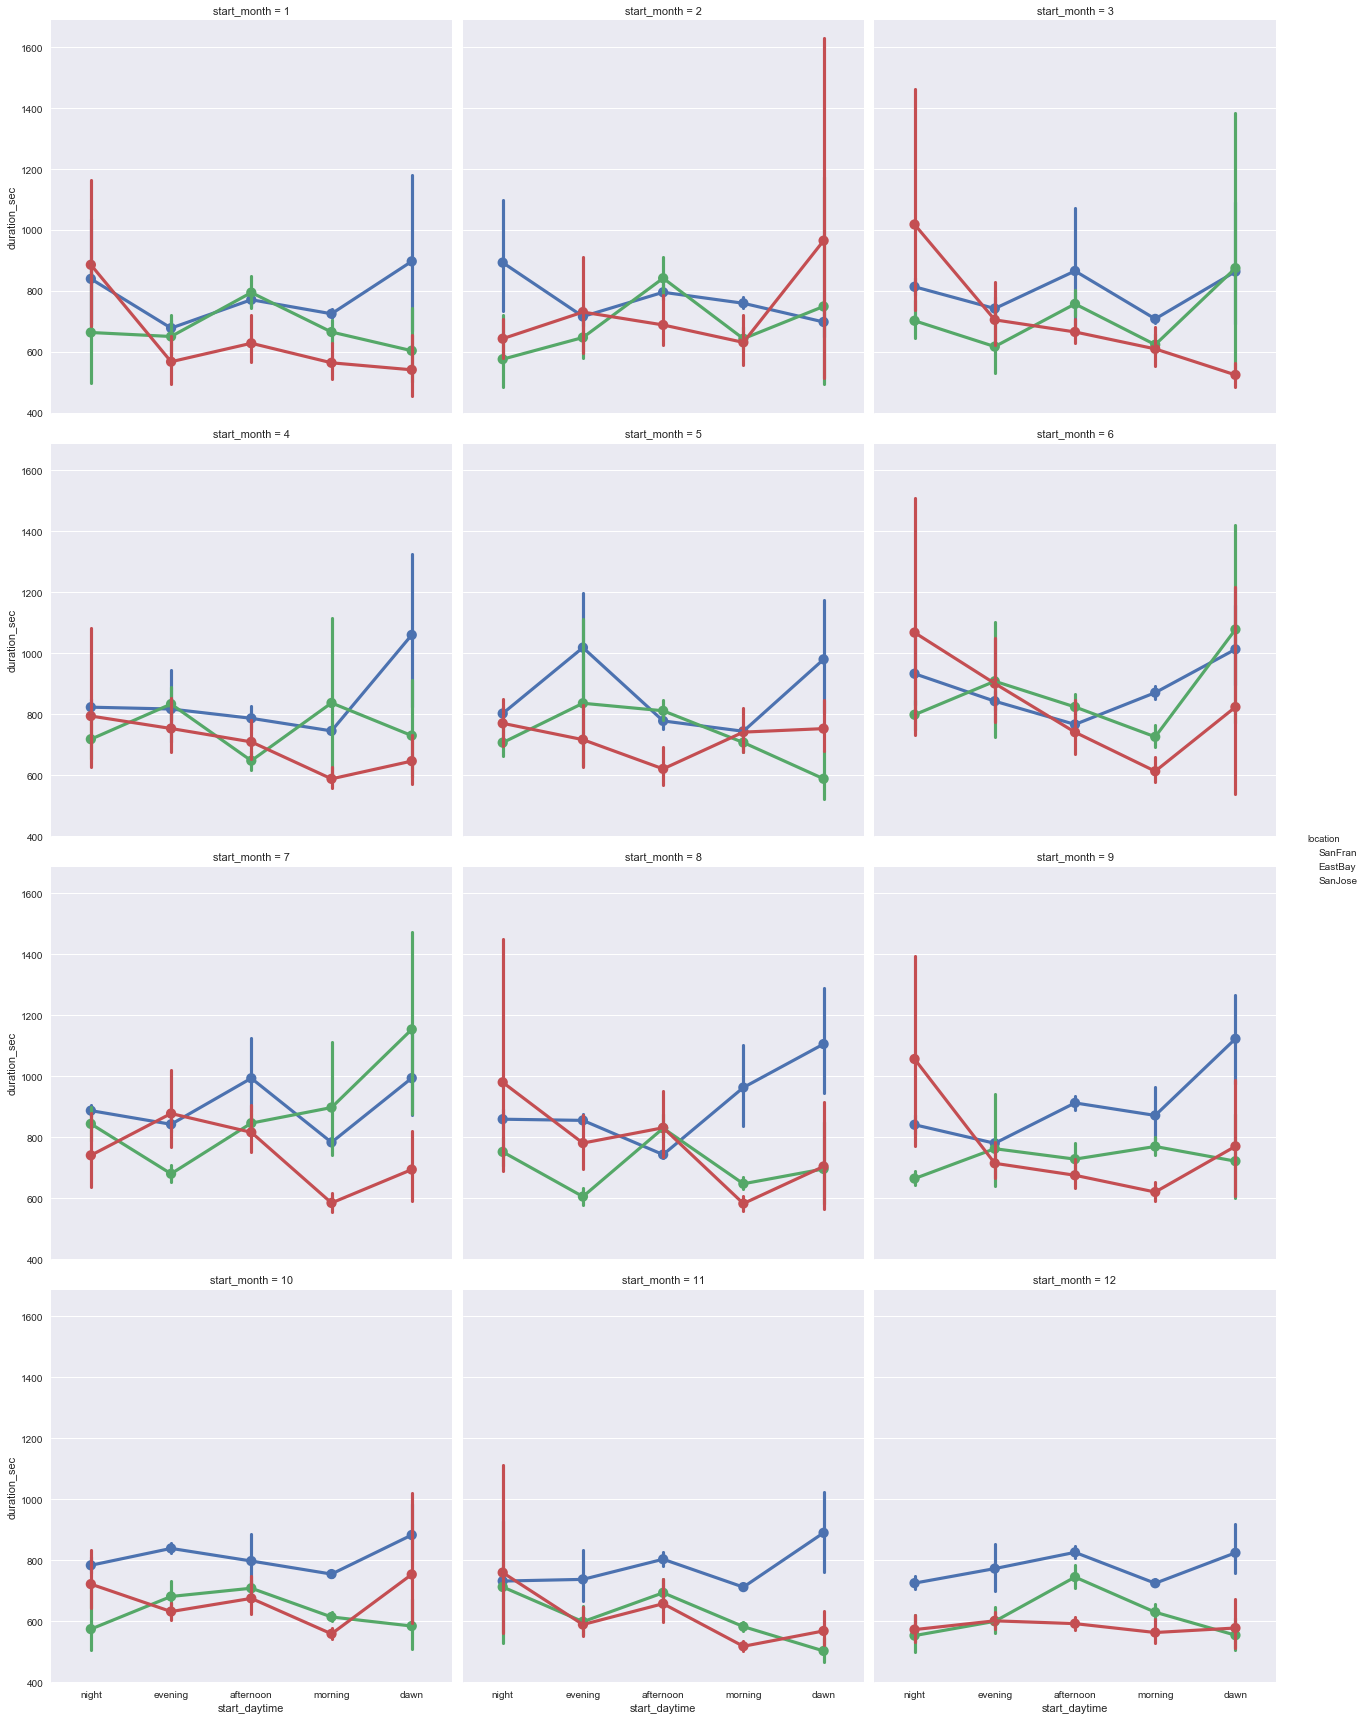

In [7]:
%%time
# month vs (start station id counts as hist), separated by location
hueOrd=rides.location.value_counts().index.values
g = sns.FacetGrid(data = rides, col = 'start_month', col_wrap=3, hue='location',size=6, hue_order=hueOrd)
g.map(sns.pointplot, 'start_daytime', 'duration_sec')
g.add_legend()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!